<a href="https://colab.research.google.com/github/NehaD-55/EduCarePCOS/blob/main/Final_one_with_clean_code_25_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) **Importing Dataset from Kaggle**:
To begin the PCOS detection and assessment
system, I first retrieved a reliable dataset from Kaggle, which includes patient information with and without PCOS. This step ensures that the analysis and machine learning models are based on a well-known and publicly accessible dataset.



In [ ]:
# Importing Dataset from Kaggle
import kagglehub
prasoonkottarathil_polycystic_ovary_syndrome_pcos_path = kagglehub.dataset_download('prasoonkottarathil/polycystic-ovary-syndrome-pcos')

print('Data source import complete.')

Data source import complete.


2) **Setting Up the Environment and Loading Packages**: To begin data analysis, I imported essential Python libraries such as numpy for numerical computations and pandas for data handling. Additionally, I used os.walk() to list and verify the input files available in the Kaggle environment under the /kaggle/input directory.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx
/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_infertility.csv


3) **Loading Core Libraries:**
These Python libraries are critical for data processing, visualization, and machine learning. They helped me handle everything from data cleaning to model evaluation.

In [ ]:
#Importing all the libraries that I use in this project

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


4) **Loading Data**:
To import the dataset into Google Colab, I used files.upload() from the google.colab module. This allowed me to upload local files (PCOS_infertility.csv and PCOS_data_without_infertility.xlsx) directly into the Colab environment for further analysis.

In [ ]:
# Uploading Files to Google Colab
from google.colab import files
uploaded = files.upload()


Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx
Saving PCOS_infertility.csv to PCOS_infertility.csv


5) **Data Preprocessing**:
Steps involved-

1. Merging the two files that are sorted into two based on patients with infertility and without infertility

2. Dropping the repeated features

3. Encoding categorical variables (dtype objects)

4. Dealing with missing values











In [ ]:
# Importing PCOS Datasets
import pandas as pd

PCOS_inf = pd.read_csv("PCOS_infertility.csv")
PCOS_woinf = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")


In [ ]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes=('','_y'),how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
# To Display Dataset Column Names
print(data.columns)


Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


**Cleaning, Transformation, and Outlier Removal**: Column names were cleaned for consistency. Numerical age was converted into categorical ranges to match the survey format. Relevant features were selected, missing values removed, and outliers filtered using Z-scores to ensure clean and reliable data for analysis.

In [ ]:

# Clean column names (if there are spaces or typos)
data.columns = data.columns.str.strip()

# Binning 'Age (yrs)' into age ranges
bins = [17, 24, 34, 45]
labels = ['18-24', '25-34', '35-45']
data['Age Range'] = pd.cut(data['Age (yrs)'], bins=bins, labels=labels, right=True)

# Created List of selected columns (I replaced the numerical age values in the training data with age ranges to align with the format used in the collected survey data, where age was recorded in categorical ranges instead of exact numbers.)
selected_columns = [
    'PCOS (Y/N)', 'Age Range', 'Weight (Kg)', 'Height(Cm)', 'BMI',
    'Cycle(R/I)', 'Waist:Hip Ratio', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
    'Hair loss(Y/N)', 'Pimples(Y/N)', 'Reg.Exercise(Y/N)'
]

# Created a new DataFrame with only the selected columns
selected_data = data[selected_columns]

# Dropped missing values
selected_data = selected_data.dropna()

# Added this import to fix the NameError
from scipy.stats import zscore

# Outlier removal only for numeric columns
numeric_data = selected_data.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_data))
threshold = 3
filtered_data = selected_data[(z_scores < threshold).all(axis=1)]

print("Original shape:", selected_data.shape)
print("Filtered shape:", filtered_data.shape)

# Visual check
filtered_data.head()


Original shape: (536, 12)
Filtered shape: (530, 12)


,PCOS (Y/N),Age Range,Weight (Kg),Height(Cm),BMI,Cycle(R/I),Waist:Hip Ratio,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N)
0,0,25-34,44.6,152.0,19.300000,2,0.833333,0,0,0,0,0
1,0,35-45,65.0,161.5,24.921163,2,0.842105,0,0,0,0,0
2,1,25-34,68.8,165.0,25.270891,2,0.900000,0,0,1,1,0
3,0,35-45,65.0,148.0,29.674945,2,0.857143,0,0,0,0,0
4,0,25-34,52.0,161.0,20.060954,2,0.810811,0,0,1,0,0


In [ ]:
# Handling missing values - Drop rows with any missing values in selected data
selected_data = selected_data.dropna()


In [ ]:
# Dataset structure overview of selected columns
selected_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 536 entries, 0 to 540
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PCOS (Y/N)            536 non-null    int64   
 1   Age Range             536 non-null    category
 2   Weight (Kg)           536 non-null    float64 
 3   Height(Cm)            536 non-null    float64 
 4   BMI                   536 non-null    float64 
 5   Cycle(R/I)            536 non-null    int64   
 6   Waist:Hip Ratio       536 non-null    float64 
 7   hair growth(Y/N)      536 non-null    int64   
 8   Skin darkening (Y/N)  536 non-null    int64   
 9   Hair loss(Y/N)        536 non-null    int64   
 10  Pimples(Y/N)          536 non-null    int64   
 11  Reg.Exercise(Y/N)     536 non-null    int64   
dtypes: category(1), float64(4), int64(7)
memory usage: 50.9 KB


In [ ]:
# Preview of Preprocessed Dataset of selected columns
selected_data.head()


,PCOS (Y/N),Age Range,Weight (Kg),Height(Cm),BMI,Cycle(R/I),Waist:Hip Ratio,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N)
0,0,25-34,44.6,152.0,19.300000,2,0.833333,0,0,0,0,0
1,0,35-45,65.0,161.5,24.921163,2,0.842105,0,0,0,0,0
2,1,25-34,68.8,165.0,25.270891,2,0.900000,0,0,1,1,0
3,0,35-45,65.0,148.0,29.674945,2,0.857143,0,0,0,0,0
4,0,25-34,52.0,161.0,20.060954,2,0.810811,0,0,1,0,0



6) **Descriptive Statistics Overview**: This step was performed to get a summary of the dataset’s key statistical properties such as mean, median, standard deviation, and range. It helps identify data distribution, spot anomalies, and guide preprocessing decisions like outlier removal.
Steps involved-


1.   Descriptive Statistics
2.   Outlier Detection and Removal
3.   Correlation Analysis (Heatmap)
4.   Feature Correlation with Target (PCOS Y/N)
5.   Statistical Significance Testing
6.   Visualization of Key Features









In [ ]:
# Get descriptive statistics (mean, std, min, 25%, 50%, 75%, max)

selected_data.describe()


,PCOS (Y/N),Weight (Kg),Height(Cm),BMI,Cycle(R/I),Waist:Hip Ratio,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N)
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.324627,59.644216,156.486560,24.312998,2.554104,0.891558,0.274254,0.307836,0.453358,0.488806,0.246269
std,0.468673,11.073609,6.041137,4.073041,0.899045,0.046362,0.446554,0.462029,0.498285,0.500342,0.431239
min,0.000000,31.000000,137.000000,12.417882,2.000000,0.755556,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,152.000000,21.641274,2.000000,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,59.000000,156.000000,24.238227,2.000000,0.894737,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,65.000000,160.000000,26.675000,4.000000,0.928571,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,108.000000,180.000000,38.900000,5.000000,0.979167,1.000000,1.000000,1.000000,1.000000,1.000000


7) **Outlier Detection and Removal using Z-Score Method**: To improve data quality and ensure accurate model training, I applied the Z-score method to detect and remove outliers from the dataset. This method identifies data points that deviate significantly from the mean (beyond 3 standard deviations), which could otherwise skew the analysis. Only numeric columns were used for this step, and the filtered dataset was validated by comparing its shape before and after outlier removal.

In [ ]:
#Automatically Detected and Removed Outliers
from scipy.stats import zscore
import numpy as np

# Keeping only numeric columns from selected data
numeric_data = selected_data.select_dtypes(include=[np.number])

# Calculated Z-scores
z_scores = np.abs(zscore(numeric_data))

# Defined threshold for outliers
threshold = 3

# Filtered out rows with any Z-score greater than threshold
filtered_data = selected_data[(z_scores < threshold).all(axis=1)]

# Checked shape before and after
print("Original shape:", selected_data.shape)
print("Filtered shape:", filtered_data.shape)


Original shape: (536, 12)
Filtered shape: (530, 12)


8) **Label Encoding and Correlation Heatmap**: To prepare categorical features for correlation analysis, I used Label Encoding to convert them into numerical format. This enabled a comprehensive heatmap visualization of feature correlations, which helps identify relationships between variables that might influence PCOS prediction. The heatmap provides valuable insights for feature selection and understanding data structure.

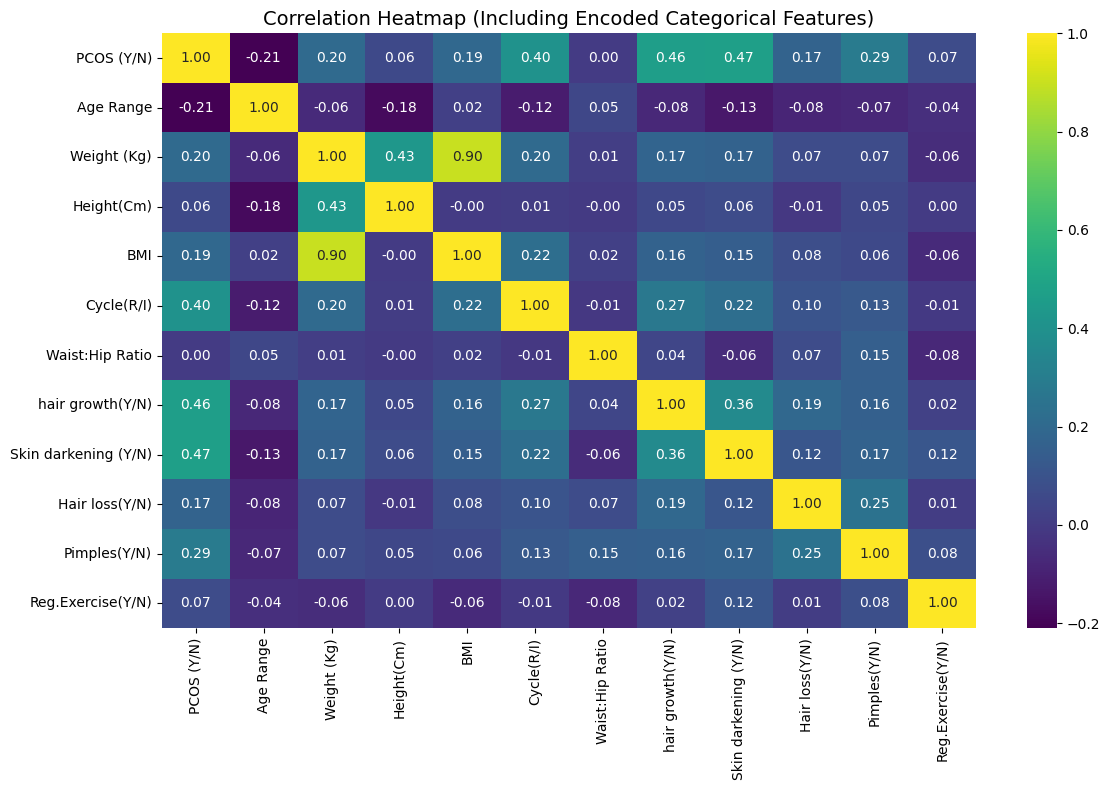

In [ ]:

#Correlation Matrix (Heatmap)

from sklearn.preprocessing import LabelEncoder

# Copy the data so original stays unchanged
encoded_data = filtered_data.copy()

# Select categorical columns (object or category types)
categorical_cols = encoded_data.select_dtypes(include=['object', 'category']).columns

# Convert all categorical columns to strings first (in case of categories)
encoded_data[categorical_cols] = encoded_data[categorical_cols].astype(str)

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    encoded_data[col] = le.fit_transform(encoded_data[col])

#Creating heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(encoded_data.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap (Including Encoded Categorical Features)', fontsize=14)
plt.tight_layout()
plt.show()




9) **Feature Correlation with PCOS Outcome**: This step analyzes how each feature correlates with the target variable ‘PCOS (Y/N)’. By sorting the correlation values, I identified which features have stronger positive or negative associations with PCOS, aiding in feature selection and understanding potential predictors.

In [ ]:
# Correlation of all features with PCOS (Y/N)
pcos_correlations = encoded_data.corr()['PCOS (Y/N)'].sort_values(ascending=False)

# Display correlations
print("Feature Correlation with PCOS (Y/N):")
print(pcos_correlations)



Feature Correlation with PCOS (Y/N):
PCOS (Y/N)              1.000000
Skin darkening (Y/N)    0.469005
hair growth(Y/N)        0.461728
Cycle(R/I)              0.404626
Pimples(Y/N)            0.290507
Weight (Kg)             0.202337
BMI                     0.193084
Hair loss(Y/N)          0.170689
Reg.Exercise(Y/N)       0.065419
Height(Cm)              0.059070
Waist:Hip Ratio         0.002271
Age Range              -0.209817
Name: PCOS (Y/N), dtype: float64


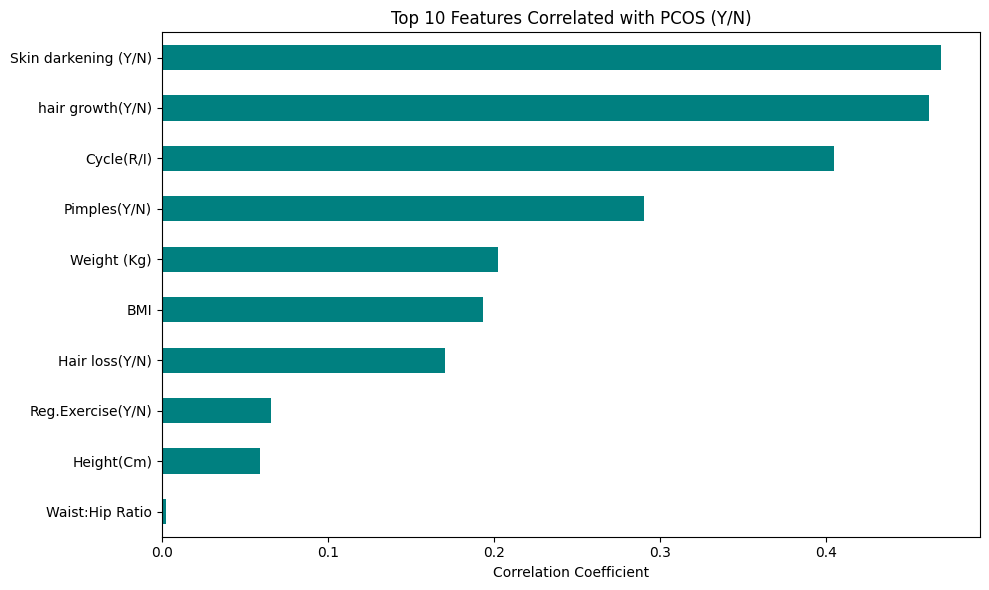

In [ ]:
#top 10 correlated features
plt.figure(figsize=(10, 6))
pcos_correlations.drop('PCOS (Y/N)').head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Features Correlated with PCOS (Y/N)')
plt.xlabel('Correlation Coefficient')
plt.gca().invert_yaxis()  # Highest correlation on top
plt.tight_layout()
plt.show()


10) **Statistical Significance Testing of Features Related to PCOS**: To determine which features have a statistically significant association with PCOS, I applied independent t-tests for numerical variables (e.g., BMI, Waist:Hip Ratio) and Chi-square tests for categorical variables (e.g., Cycle type, Hair loss, Age Range). Features with p-values **< 0.05** were considered statistically significant, helping to identify potential predictors for PCOS.

In [ ]:
#assessing assess which features are statistically significant in relation to PCOS (Y/N),
#For numerical → used Independent t-test (e.g., BMI, Waist:Hip Ratio)
#For categorical → used Chi-square test (e.g., Cycle(R/I), Hair loss(Y/N), Age Range)

from scipy.stats import ttest_ind, chi2_contingency

# Separated PCOS and non-PCOS groups
pcos_group = encoded_data[encoded_data['PCOS (Y/N)'] == 1]
non_pcos_group = encoded_data[encoded_data['PCOS (Y/N)'] == 0]

# Stored results
significance_results = []

for col in encoded_data.columns:
    if col == 'PCOS (Y/N)':
        continue

    if encoded_data[col].dtype in ['int64', 'float64']:  # Numerical → T-test
        stat, p_val = ttest_ind(pcos_group[col], non_pcos_group[col], equal_var=False)
        test_type = 'T-test'
    else:  # Categorical → Chi-square
        contingency = pd.crosstab(encoded_data[col], encoded_data['PCOS (Y/N)'])
        stat, p_val, _, _ = chi2_contingency(contingency)
        test_type = 'Chi-square'

    significance_results.append({
        'Feature': col,
        'Test': test_type,
        'P-Value': p_val
    })

# Created DataFrame of results
significance_df = pd.DataFrame(significance_results).sort_values('P-Value')

# Display
print("Statistical Significance of Features (sorted by p-value):")
print(significance_df)

#Interpretation:
#P-value < 0.05 → Statistically significant feature.

significant_features = significance_df[significance_df['P-Value'] < 0.05]
print("Significant features (p < 0.05):")
print(significant_features)



Statistical Significance of Features (sorted by p-value):
                 Feature    Test       P-Value
7   Skin darkening (Y/N)  T-test  2.196937e-23
6       hair growth(Y/N)  T-test  1.896138e-21
4             Cycle(R/I)  T-test  4.852270e-17
9           Pimples(Y/N)  T-test  5.825854e-12
0              Age Range  T-test  1.066964e-06
1            Weight (Kg)  T-test  1.127180e-05
3                    BMI  T-test  2.007624e-05
8         Hair loss(Y/N)  T-test  9.098942e-05
10     Reg.Exercise(Y/N)  T-test  1.440372e-01
2             Height(Cm)  T-test  1.789758e-01
5        Waist:Hip Ratio  T-test  9.582351e-01
Significant features (p < 0.05):
                Feature    Test       P-Value
7  Skin darkening (Y/N)  T-test  2.196937e-23
6      hair growth(Y/N)  T-test  1.896138e-21
4            Cycle(R/I)  T-test  4.852270e-17
9          Pimples(Y/N)  T-test  5.825854e-12
0             Age Range  T-test  1.066964e-06
1           Weight (Kg)  T-test  1.127180e-05
3                   BMI

11) **Visualization of Top Significant Features with Respect to PCOS**: Based on the statistical significance analysis, I selected key features (both categorical and numerical) for visual exploration. Count plots were used for categorical features such as Skin darkening, Hair growth, Cycle irregularity, etc., and boxplots for numerical features like Weight and BMI. This helped in visually understanding the distribution and relationship of these features with PCOS diagnosis.



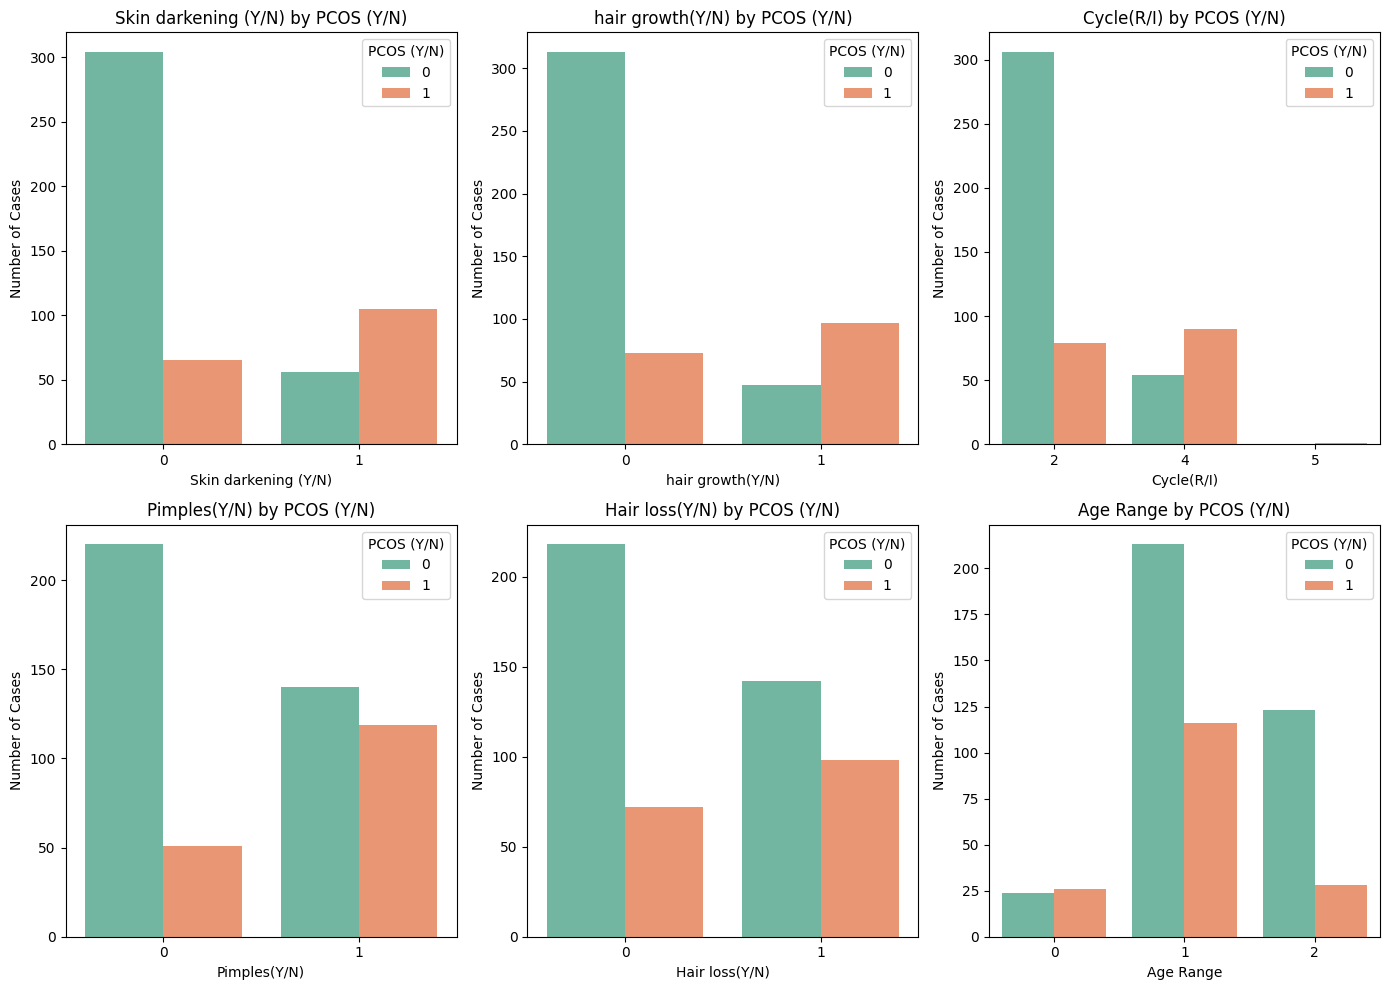

<ipython-input-18-03669b5049e2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=encoded_data, x='PCOS (Y/N)', y=col, palette='Set2')
<ipython-input-18-03669b5049e2>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=encoded_data, x='PCOS (Y/N)', y=col, palette='Set2')


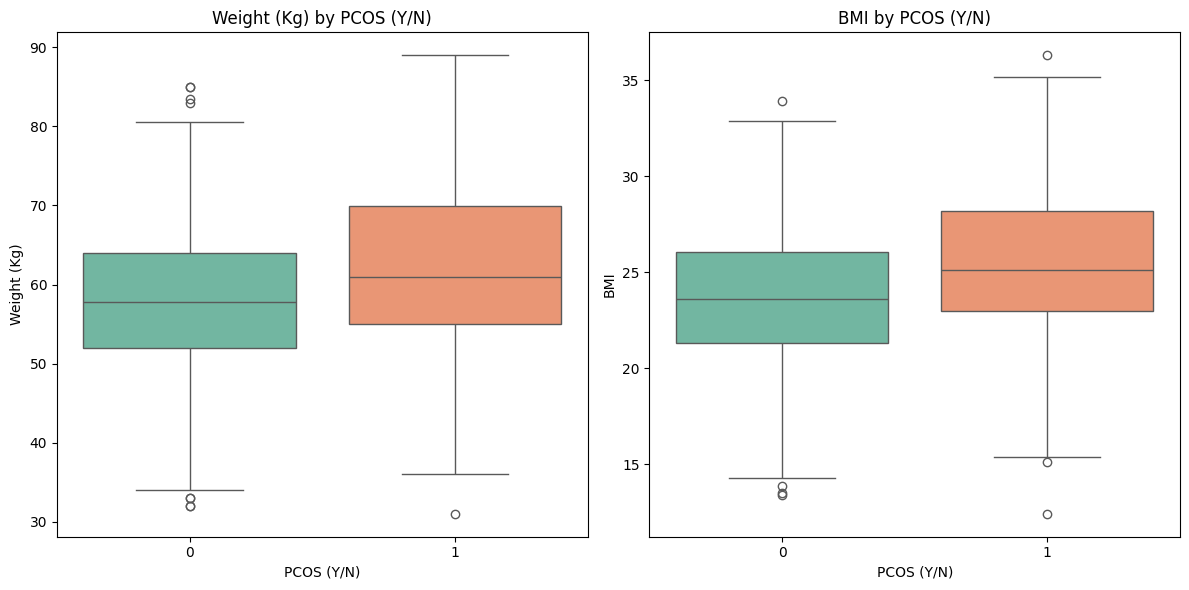

In [ ]:
#Top Features to Visualize (from p-values):
#I focused on these:
#Categorical: Skin darkening (Y/N), hair growth(Y/N), Cycle(R/I), Pimples(Y/N), Hair loss(Y/N), Age Range
#Numerical: Weight (Kg), BMI

# 1.Categorical Features vs PCOS
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical features to visualize
categorical_features = [
    'Skin darkening (Y/N)',
    'hair growth(Y/N)',
    'Cycle(R/I)',
    'Pimples(Y/N)',
    'Hair loss(Y/N)',
    'Age Range'
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=encoded_data, x=col, hue='PCOS (Y/N)', palette='Set2')
    plt.title(f'{col} by PCOS (Y/N)')
    plt.xlabel(col)
    plt.ylabel('Number of Cases')

plt.tight_layout()
plt.show()



#Numerical Features vs PCOS

# Numerical features to visualize
numerical_features = ['Weight (Kg)', 'BMI']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=encoded_data, x='PCOS (Y/N)', y=col, palette='Set2')
    plt.title(f'{col} by PCOS (Y/N)')
    plt.xlabel('PCOS (Y/N)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



12) **Model Building and Evaluation for PCOS Prediction**: This section outlines the process of developing a predictive model for PCOS using selected features. The 'Age Range' variable was label encoded to be used as a numerical input. A Random Forest Classifier was trained after splitting the dataset into training and testing sets (with stratification to maintain class balance). Model performance was assessed using accuracy, confusion matrix, and classification report to evaluate its effectiveness in correctly identifying PCOS cases.

In [ ]:
#model building for predicting PCOS

# Label encoding for training data
from sklearn.preprocessing import LabelEncoder

# Make a copy of the column BEFORE encoding
selected_data['Age Range Original'] = selected_data['Age Range']

# Initialize the encoder
le = LabelEncoder()

# Fit on the original column (must be strings or categories)
selected_data['Age Range Encoded'] = le.fit_transform(selected_data['Age Range Original'].astype(str))

# Show the label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

# View some results
print(selected_data[['Age Range Original', 'Age Range Encoded']].head())





# Prepared Features and Target
X = filtered_data.copy()

# First, encode Age Range column (again) in filtered_data if not done already
X['Age Range Original'] = X['Age Range']
X['Age Range Encoded'] = le.transform(X['Age Range Original'].astype(str))

# Now use encoded column for model
X_model = X[['Age Range Encoded', 'Weight (Kg)', 'BMI', 'Cycle(R/I)',
             'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
             'Pimples(Y/N)', 'Reg.Exercise(Y/N)']]

y = X['PCOS (Y/N)']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = rf.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Label Encoding Mapping:
{'18-24': np.int64(0), '25-34': np.int64(1), '35-45': np.int64(2)}
  Age Range Original  Age Range Encoded
0              25-34                  1
1              35-45                  2
2              25-34                  1
3              35-45                  2
4              25-34                  1
Accuracy: 0.8773584905660378

Confusion Matrix:
 [[64  8]
 [ 5 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        72
           1       0.78      0.85      0.82        34

    accuracy                           0.88       106
   macro avg       0.86      0.87      0.86       106
weighted avg       0.88      0.88      0.88       106



13) **Model Building and Evaluation Using XGBoost Classifier**: This section involves training a predictive model using the XGBoost Classifier, known for its speed and high performance in classification tasks. After initializing the model with defined hyperparameters, it was trained on the PCOS dataset. The model’s accuracy, confusion matrix, and classification report were used to evaluate its performance in predicting PCOS, helping identify how well it distinguishes between affected and non-affected individuals.



In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8867924528301887


In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[66  6]
 [ 6 28]]


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        72
           1       0.82      0.82      0.82        34

    accuracy                           0.89       106
   macro avg       0.87      0.87      0.87       106
weighted avg       0.89      0.89      0.89       106



14) **Model Building and Evaluation Using CatBoost Classifier**:In this section, the CatBoost Classifier was used to build a predictive model for PCOS classification. CatBoost is a gradient boosting algorithm designed to handle categorical features efficiently, making it suitable for datasets with such variables. The categorical features were encoded, and the model was trained on the PCOS dataset. Following training, the model’s performance was evaluated using accuracy, confusion matrix, and classification report, providing insights into its effectiveness in distinguishing between individuals with and without PCOS.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
# Importing the necessary libraries for CatBoost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Convert categorical features to the 'category' data type
categorical_features = ['Age Range', 'Cycle(R/I)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
                        'Hair loss(Y/N)', 'Pimples(Y/N)', 'Reg.Exercise(Y/N)']

# Convert the categorical columns into 'category' dtype for CatBoost
for feature in categorical_features:
    filtered_data[feature] = filtered_data[feature].astype('category')

# Define Features (X) and Target (y)
X = filtered_data.drop('PCOS (Y/N)', axis=1)  # Features (all columns except 'PCOS (Y/N)')
y = filtered_data['PCOS (Y/N)']  # Target variable (PCOS status)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoost model (similar to RandomForestClassifier)
model = CatBoostClassifier(
    iterations=1000,  # Number of boosting rounds
    depth=6,  # Depth of trees
    learning_rate=0.1,  # Learning rate
    loss_function='Logloss',  # Objective function
    cat_features=[X.columns.get_loc(c) for c in categorical_features],  # Indices of categorical features
    random_state=42,
    verbose=200  # Print progress every 200 iterations
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


<ipython-input-26-c1239a22b518>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[feature] = filtered_data[feature].astype('category')


0:	learn: 0.6340495	total: 103ms	remaining: 1m 43s
200:	learn: 0.0481637	total: 2.11s	remaining: 8.4s
400:	learn: 0.0184426	total: 3.82s	remaining: 5.71s
600:	learn: 0.0110013	total: 5.08s	remaining: 3.38s
800:	learn: 0.0073348	total: 6.55s	remaining: 1.63s
999:	learn: 0.0058711	total: 7.75s	remaining: 0us
Accuracy: 0.8490566037735849

Confusion Matrix:
 [[68  2]
 [14 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        70
           1       0.92      0.61      0.73        36

    accuracy                           0.85       106
   macro avg       0.87      0.79      0.81       106
weighted avg       0.86      0.85      0.84       106



15) **Loading and Previewing Test Data**: In this section, the test data, which is structured similarly to the training dataset, is loaded from an Excel file ('Survey_data.xlsx'). The data is sourced from surveys collected online from participants, ensuring consistency in the format for model evaluation. By previewing the first few rows with head(), we can confirm the successful loading and examine the structure of the dataset to ensure it aligns with the format used in the model's training phase.

In [ ]:
#1. Loading New Data

from google.colab import files
uploaded = files.upload()

Saving Survey_data.xlsx to Survey_data.xlsx


In [ ]:
import pandas as pd

# Replace the filename if different
new_data = pd.read_excel('Survey_data.xlsx', sheet_name='Clean_survey_data')

# Quick preview
new_data.head()




,Participant no.,PCOS (Y/N),Age Range (yrs),Weight (Kg),Height(Cm),BMI,Cycle(R/I),Hip(inch),Waist(inch),Waist:Hip Ratio,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Reg.Exercise(Y/N),Level of Education
0,1,0,35-45,60,156.0,24.654832,0,38.0,28.0,0.736842,0,0,0,0,1,Higher Education (Undergraduate / Postgraduate)
1,2,0,25-34,60,165.0,22.038567,0,35.0,25.0,0.714286,0,0,0,0,1,Higher Education (Undergraduate / Postgraduate)
2,3,0,18-24,48,166.0,17.419074,1,28.0,26.0,0.928571,0,0,0,1,1,Higher Education (Undergraduate / Postgraduate)
3,4,0,18-24,45,150.0,20.000000,0,33.0,23.0,0.696970,0,0,0,1,1,Higher Education (Undergraduate / Postgraduate)
4,5,1,35-45,82,163.0,30.863036,0,43.0,37.0,0.860465,1,0,1,0,1,Higher Education (Undergraduate / Postgraduate)


16) **Outlier Detection and Flagging in Test Data**:In this section, I identified and flagged outliers in the survey data to ensure data integrity for further analysis. Using Z-scores, I detected values that were more than 3 standard deviations away from the mean, marking them as outliers. I added flags for each numeric column to identify individual outliers and a column to highlight rows containing any outliers. This process helps maintain the reliability of the data before model building.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Fix column names (remove extra spaces)
new_data.columns = new_data.columns.str.strip()

# Select only relevant columns
selected_columns = [
    'PCOS (Y/N)', 'Age Range (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
    'Cycle(R/I)', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
    'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
    'Pimples(Y/N)', 'Reg.Exercise(Y/N)'
]

selected_data = new_data[selected_columns]

# Identify numeric columns for outlier detection
numeric_cols = selected_data.select_dtypes(include=[np.number]).columns

# Calculate Z-scores and mark outliers
z_scores = selected_data[numeric_cols].apply(lambda x: zscore(x, nan_policy='omit'))

# Define outlier threshold
threshold = 3

# Add columns to flag outliers for each numeric column
for col in numeric_cols:
    selected_data[f'{col}_Outlier'] = (np.abs(z_scores[col]) > threshold)

# Add column to flag rows that have **any** outliers
selected_data['Any_Outlier'] = selected_data[[f'{col}_Outlier' for col in numeric_cols]].any(axis=1)

# View the dataset with outlier flags
print(selected_data.head())
print("\nOutlier Summary:")
print(selected_data['Any_Outlier'].value_counts())

# Check how many outliers per column
outlier_counts = selected_data[[f'{col}_Outlier' for col in numeric_cols]].sum()
print("\nOutliers per numeric column:\n", outlier_counts)


   PCOS (Y/N) Age Range (yrs)  Weight (Kg)  Height(Cm)        BMI  Cycle(R/I)  \
0           0           35-45           60       156.0  24.654832           0   
1           0           25-34           60       165.0  22.038567           0   
2           0           18-24           48       166.0  17.419074           1   
3           0           18-24           45       150.0  20.000000           0   
4           1           35-45           82       163.0  30.863036           0   

   Hip(inch)  Waist(inch)  Waist:Hip Ratio  hair growth(Y/N)  ...  \
0       38.0         28.0         0.736842                 0  ...   
1       35.0         25.0         0.714286                 0  ...   
2       28.0         26.0         0.928571                 0  ...   
3       33.0         23.0         0.696970                 0  ...   
4       43.0         37.0         0.860465                 1  ...   

   Cycle(R/I)_Outlier  Hip(inch)_Outlier  Waist(inch)_Outlier  \
0               False            

<ipython-input-29-504d4bfc493d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[f'{col}_Outlier'] = (np.abs(z_scores[col]) > threshold)


17) **Identifying Missing Values in the Data**: In this step, I assessed the presence of missing values in the dataset by calculating the sum of missing entries for each column.

In [ ]:
#Identify Missing Values
print("\nMissing values per column:")
print(selected_data.isnull().sum())



Missing values per column:
PCOS (Y/N)                      0
Age Range (yrs)                 0
Weight (Kg)                     0
Height(Cm)                      0
BMI                             0
Cycle(R/I)                      0
Hip(inch)                       1
Waist(inch)                     1
Waist:Hip Ratio                 1
hair growth(Y/N)                0
Skin darkening (Y/N)            0
Hair loss(Y/N)                  0
Pimples(Y/N)                    0
Reg.Exercise(Y/N)               0
PCOS (Y/N)_Outlier              0
Weight (Kg)_Outlier             0
Height(Cm)_Outlier              0
BMI_Outlier                     0
Cycle(R/I)_Outlier              0
Hip(inch)_Outlier               0
Waist(inch)_Outlier             0
Waist:Hip Ratio_Outlier         0
hair growth(Y/N)_Outlier        0
Skin darkening (Y/N)_Outlier    0
Hair loss(Y/N)_Outlier          0
Pimples(Y/N)_Outlier            0
Reg.Exercise(Y/N)_Outlier       0
Any_Outlier                     0
dtype: int64


18) **Imputation of Missing Values in Numeric Columns**: Missing values in the 'Hip (inch)', 'Waist (inch)', and 'Waist:Hip Ratio' columns were imputed using the median of each column. The median was chosen to avoid the influence of outliers, ensuring a more robust and accurate dataset for further analysis.

In [ ]:
# Fill the 3 numeric columns with their median
selected_data['Hip(inch)'].fillna(selected_data['Hip(inch)'].median(), inplace=True)
selected_data['Waist(inch)'].fillna(selected_data['Waist(inch)'].median(), inplace=True)
selected_data['Waist:Hip Ratio'].fillna(selected_data['Waist:Hip Ratio'].median(), inplace=True)


<ipython-input-31-405d606c1973>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_data['Hip(inch)'].fillna(selected_data['Hip(inch)'].median(), inplace=True)
<ipython-input-31-405d606c1973>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

19) **Verifying Missing Values After Imputation**: I checked the dataset again to confirm that all missing values were filled correctly, ensuring no null values remain for analysis and modeling.

In [ ]:
# Verifying Missing Values
print("\n✅ Missing values after filling:")
print(selected_data.isnull().sum())



✅ Missing values after filling:
PCOS (Y/N)                      0
Age Range (yrs)                 0
Weight (Kg)                     0
Height(Cm)                      0
BMI                             0
Cycle(R/I)                      0
Hip(inch)                       0
Waist(inch)                     0
Waist:Hip Ratio                 0
hair growth(Y/N)                0
Skin darkening (Y/N)            0
Hair loss(Y/N)                  0
Pimples(Y/N)                    0
Reg.Exercise(Y/N)               0
PCOS (Y/N)_Outlier              0
Weight (Kg)_Outlier             0
Height(Cm)_Outlier              0
BMI_Outlier                     0
Cycle(R/I)_Outlier              0
Hip(inch)_Outlier               0
Waist(inch)_Outlier             0
Waist:Hip Ratio_Outlier         0
hair growth(Y/N)_Outlier        0
Skin darkening (Y/N)_Outlier    0
Hair loss(Y/N)_Outlier          0
Pimples(Y/N)_Outlier            0
Reg.Exercise(Y/N)_Outlier       0
Any_Outlier                     0
dtype: int64


In [ ]:
#Dataset Information Overview
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PCOS (Y/N)                    22 non-null     int64  
 1   Age Range (yrs)               22 non-null     object 
 2   Weight (Kg)                   22 non-null     int64  
 3   Height(Cm)                    22 non-null     float64
 4   BMI                           22 non-null     float64
 5   Cycle(R/I)                    22 non-null     int64  
 6   Hip(inch)                     22 non-null     float64
 7   Waist(inch)                   22 non-null     float64
 8   Waist:Hip Ratio               22 non-null     float64
 9   hair growth(Y/N)              22 non-null     int64  
 10  Skin darkening (Y/N)          22 non-null     int64  
 11  Hair loss(Y/N)                22 non-null     int64  
 12  Pimples(Y/N)                  22 non-null     int64  
 13  Reg.Exe

20) **Defining Risk Levels Based on Probability of PCOS**: The risk_level() function categorizes the probability of PCOS into four risk levels: 'No Risk', 'Mild Risk', 'Moderate Risk', and 'Severe Risk'. Based on probability thresholds, it helps convert continuous values into actionable risk categories, aiding in easier interpretation of model predictions.

In [ ]:
def risk_level(prob):
    """ Map probability of PCOS to risk categories """
    if prob < 0.25:
        return 'No Risk'
    elif prob < 0.5:
        return 'Mild Risk'
    elif prob < 0.75:
        return 'Moderate Risk'
    else:
        return 'Severe Risk'


21) **Data Preprocessing - Renaming and Label Encoding** : The column 'Age Range (yrs)' is renamed to 'Age Range' for clarity and consistency. Label encoding is then applied to this column to convert the categorical age ranges into numerical labels, which are required for machine learning algorithms. The relevant and same features as testing data are selected for further analysis to build the predictive model.

In [ ]:
# Rename the column to a cleaner name
selected_data.rename(columns={'Age Range (yrs)': 'Age Range'}, inplace=True)


# Make a copy of the original Age Range column from testing data
selected_data['Age Range Original'] = selected_data['Age Range']

# Apply only transform (NOT fit_transform) using encoder fitted on training data
selected_data['Age Range Encoded'] = le.transform(selected_data['Age Range Original'].astype(str))

# Show how it got encoded
print(selected_data[['Age Range Original', 'Age Range Encoded']].head())




# Now select your features
features = ['Age Range Encoded', 'Weight (Kg)', 'BMI', 'Cycle(R/I)',
            'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
            'Pimples(Y/N)', 'Reg.Exercise(Y/N)']

X_new = selected_data[features]


  Age Range Original  Age Range Encoded
0              35-45                  2
1              25-34                  1
2              18-24                  0
3              18-24                  0
4              35-45                  2


22) **Probability Prediction and Risk Classification Using Random Forest**: I used the trained Random Forest model to predict the probability of PCOS using the predict_proba method, focusing on the probability of class 1 (PCOS). This probability was added as a new column, RF_Prob. To enhance interpretability, I applied a custom risk_level function, categorizing the probability into risk levels (No Risk, Mild Risk, Moderate Risk, and Severe Risk), which was stored in the RF_Risk column. This approach provides actionable risk classifications for each individual based on their likelihood of having PCOS.

In [ ]:
# Predict probabilities
rf_probs = rf.predict_proba(X_new)[:, 1]  # Probability of class 1 (PCOS)

# Add predictions to the DataFrame
selected_data['RF_Prob'] = rf_probs
selected_data['RF_Risk'] = selected_data['RF_Prob'].apply(risk_level)


23) **Predicting PCOS Probability and Risk Classification with XGBoost**: I used the XGBoost model to predict the probability of PCOS (class 1) with predict_proba. The probability was added as XGB_Prob. I then applied the risk_level function to categorize the probability into risk levels (No Risk, Mild Risk, Moderate Risk, Severe Risk), storing the results in the XGB_Risk column for easier interpretation.

In [ ]:
# Predict probabilities
xgb_probs = xgb_model.predict_proba(X_new)[:, 1]

# Add to DataFrame
selected_data['XGB_Prob'] = xgb_probs
selected_data['XGB_Risk'] = selected_data['XGB_Prob'].apply(risk_level)


24) **Handling Missing Columns and Predicting with CatBoost**: I ensured that the new dataset (X_new) included all the columns used during training, adding any missing ones with default values (e.g., np.nan). The columns were then reordered to match the training data, and categorical features were correctly typed.

Using the CatBoost model, I predicted the probability of PCOS, storing it in CatBoost_Prob. I applied the risk_level function to classify the risk into categories (e.g., No Risk, Mild Risk), which was saved in the CatBoost_Risk column. This approach allowed for actionable risk predictions based on the model's output.










In [ ]:
import numpy as np
from catboost import Pool

# Get expected columns from training
expected_columns = X_train.columns

# Make a copy of X_new to avoid modifying the original
X_new = X_new.copy()

# Fix missing columns
for col in expected_columns:
    if col not in X_new.columns:
        if col in categorical_features:
            X_new.loc[:, col] = 'NaN'  # For CatBoost, use string for missing categorical
        else:
            X_new.loc[:, col] = np.nan  # For numerical features

# Reorder columns to match training
X_new = X_new[expected_columns]

# Ensure categorical columns are strings (CatBoost requirement)
for feature in categorical_features:
    if feature in X_new.columns:
        X_new.loc[:, feature] = X_new[feature].astype(str)

# Get column indices of categorical features
cat_feature_indices = [X_new.columns.get_loc(col) for col in categorical_features]

# Create Pool and predict
predict_pool = Pool(data=X_new, cat_features=cat_feature_indices)
catboost_probs = model.predict_proba(predict_pool)[:, 1]

# Update predictions
selected_data = selected_data.copy()
selected_data['CatBoost_Prob'] = catboost_probs
selected_data['CatBoost_Risk'] = selected_data['CatBoost_Prob'].apply(risk_level)



<ipython-input-38-542ccb6751ec>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '1' '1' '0' '0' '1' '1' '1' '1'
 '1' '1' '1' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_new.loc[:, feature] = X_new[feature].astype(str)
<ipython-input-38-542ccb6751ec>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' '0' '1' '0' '0' '1' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0'
 '0' '1' '0' '0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_new.loc[:, feature] = X_new[feature].astype(str)
<ipython-input-38-542ccb6751ec>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0'
 

25) **Displaying Final Risk Predictions and Saving Results**: In this step, I displayed the first few rows of the final dataset with the risk classifications from the three models: Random Forest (RF_Risk), XGBoost (XGB_Risk), and CatBoost (CatBoost_Risk). This provides an overview of the predicted risk levels for each individual.

Additionally, I saved the updated dataset with the risk predictions to an Excel file (Survey_Predictions_with_Risk.xlsx) for further analysis and documentation. This step ensures that the results can be shared or reviewed in the future.

In [ ]:
# Show final results
print(selected_data[['RF_Risk', 'XGB_Risk', 'CatBoost_Risk']].head())

# Optionally save to Excel
selected_data.to_excel("Survey_Predictions_with_Risk.xlsx", index=False)


     RF_Risk   XGB_Risk CatBoost_Risk
0  Mild Risk  Mild Risk       No Risk
1  Mild Risk    No Risk       No Risk
2    No Risk  Mild Risk       No Risk
3    No Risk  Mild Risk       No Risk
4  Mild Risk  Mild Risk   Severe Risk


26) **Post prediction exploratory analysis**:  


1.   Visualize Risk Distribution-  how the model scored risk across the dataset.
2.   Compare Predictions vs Actual
3.   Risk Level vs Features- how certain features vary with the predicted risk levels.
4.   Risk vs Categorical Features- To see if certain symptoms are more common in predicted high-risk groups.
5.  Correlation Between Predicted Probability and Numerical Features




<ipython-input-40-490037255c6c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CatBoost_Risk', data=selected_data, palette='Set2')


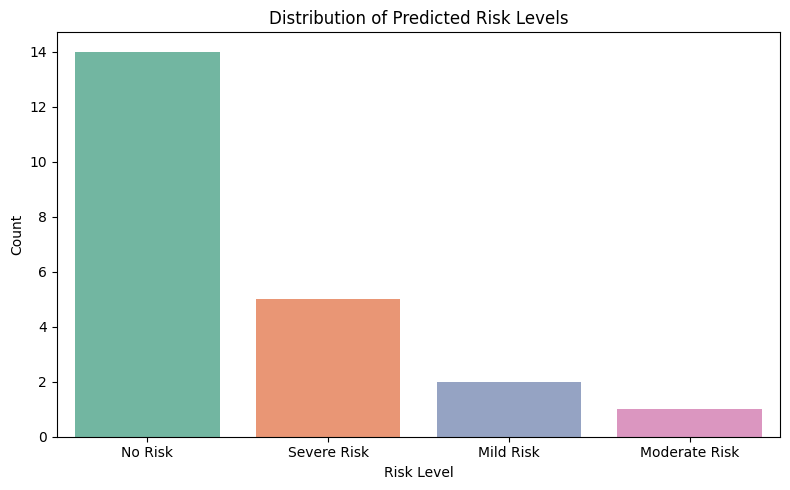

In [ ]:
# Visualize Risk Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of predicted risk levels
plt.figure(figsize=(8, 5))
sns.countplot(x='CatBoost_Risk', data=selected_data, palette='Set2')
plt.title("Distribution of Predicted Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




<ipython-input-41-f13fa4cc4aa8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='PCOS (Y/N)', y='CatBoost_Prob', palette='coolwarm')


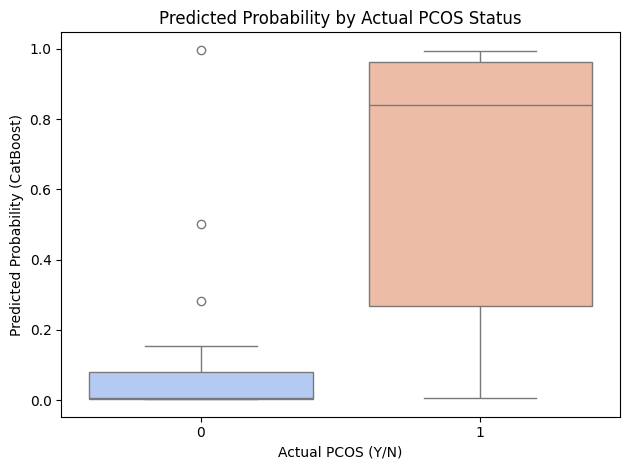

In [ ]:
# Compare predicted probabilities with actual outcome
sns.boxplot(data=selected_data, x='PCOS (Y/N)', y='CatBoost_Prob', palette='coolwarm')
plt.title("Predicted Probability by Actual PCOS Status")
plt.xlabel("Actual PCOS (Y/N)")
plt.ylabel("Predicted Probability (CatBoost)")
plt.tight_layout()
plt.show()


<ipython-input-42-7f6a3e45a1c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='CatBoost_Risk', y=feature, palette='Set3')


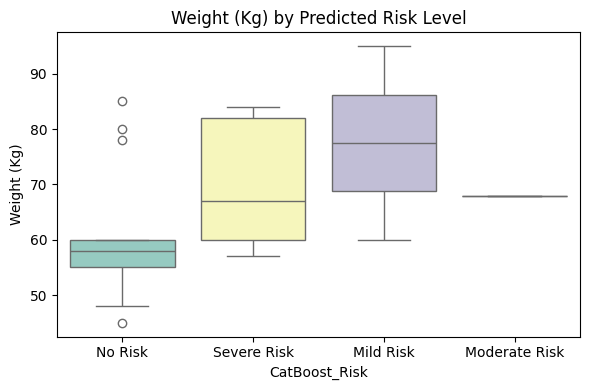

<ipython-input-42-7f6a3e45a1c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='CatBoost_Risk', y=feature, palette='Set3')


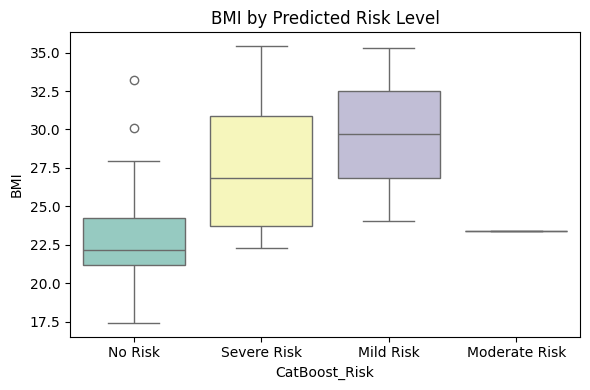

<ipython-input-42-7f6a3e45a1c9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=selected_data, x='CatBoost_Risk', y=feature, palette='Set3')


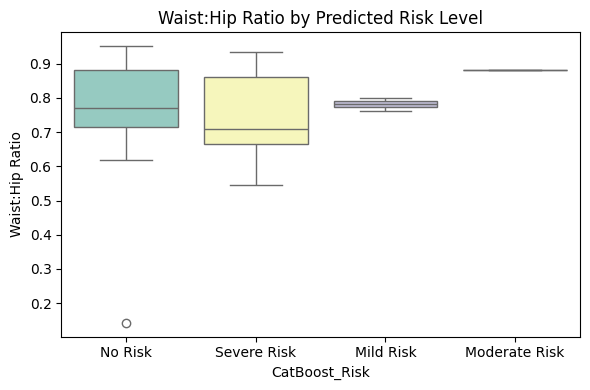

In [ ]:
# For all numerical features: Risk Level vs Features
numerical_to_check = ['Weight (Kg)', 'BMI', 'Waist:Hip Ratio']

for feature in numerical_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=selected_data, x='CatBoost_Risk', y=feature, palette='Set3')
    plt.title(f'{feature} by Predicted Risk Level')
    plt.tight_layout()
    plt.show()


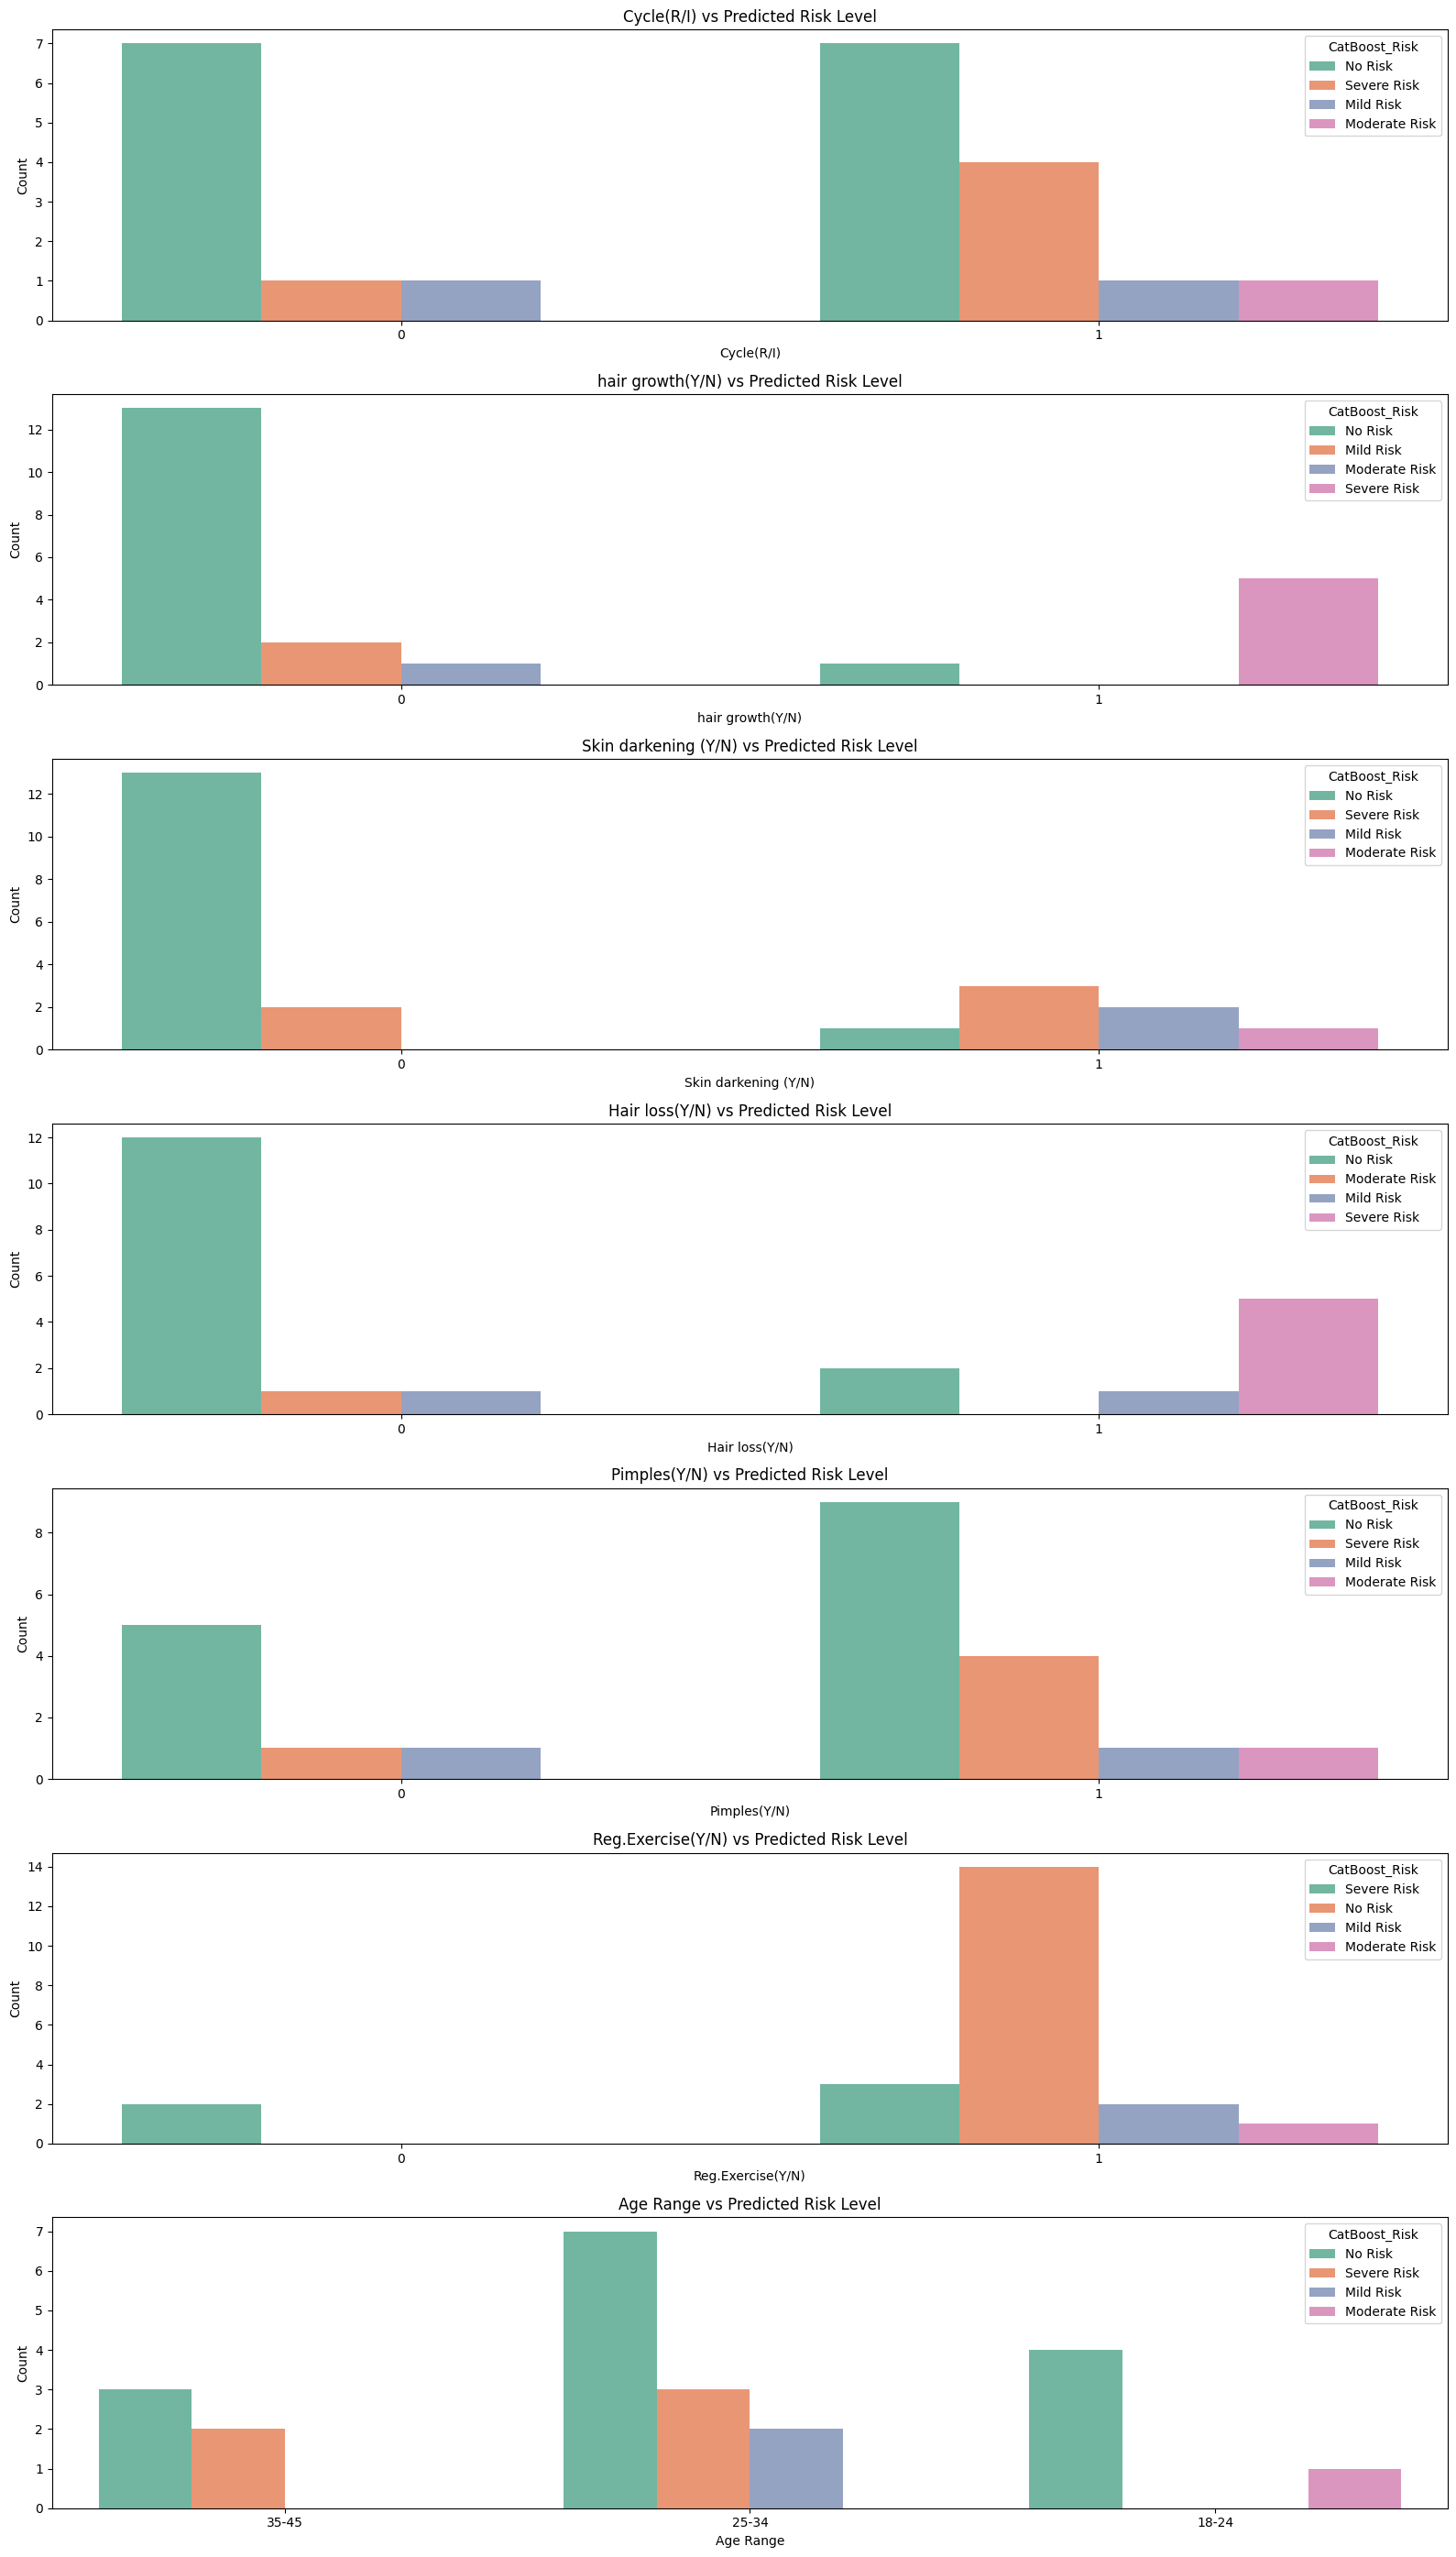

In [ ]:
#For all categorical features: Risk Level vs Features
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical features to analyze
categorical_features = [
    'Cycle(R/I)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)',
    'Hair loss(Y/N)',
    'Pimples(Y/N)',
    'Reg.Exercise(Y/N)',
    'Age Range',  # if it's still categorical
    # Add more if applicable
]

# Plot each categorical feature against predicted risk level
plt.figure(figsize=(16, len(categorical_features) * 4))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(data=selected_data, x=col, hue='CatBoost_Risk', palette='Set2')
    plt.title(f'{col} vs Predicted Risk Level')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


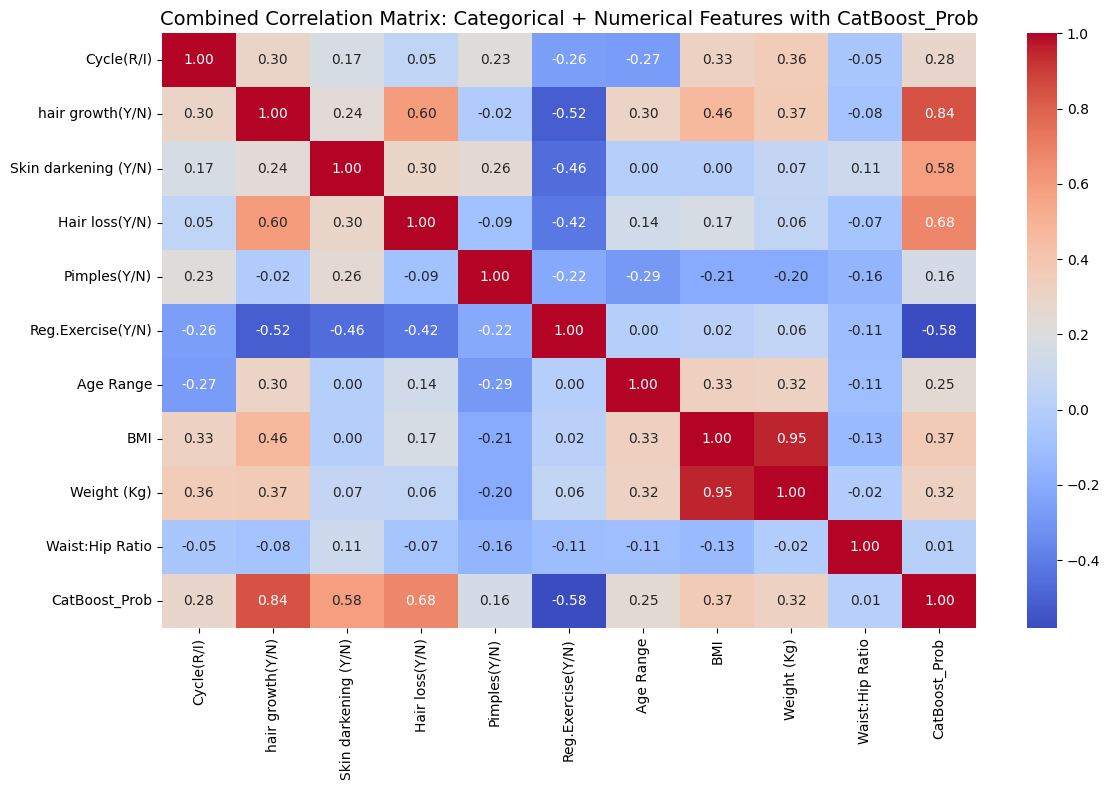

In [ ]:
#Correlation Between Predicted Probability and Numerical and categorical Features
#Correlation matrix including CatBoost_Prob

from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid touching original data
combined_data = selected_data.copy()

# List of categorical features
categorical_features = [
    'Cycle(R/I)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)',
    'Hair loss(Y/N)',
    'Pimples(Y/N)',
    'Reg.Exercise(Y/N)',
    'Age Range'
]

# Label encode the categorical features
le = LabelEncoder()
for col in categorical_features:
    combined_data[col] = le.fit_transform(combined_data[col].astype(str))

# List of numerical features to include
numerical_features = ['BMI', 'Weight (Kg)', 'Waist:Hip Ratio', 'CatBoost_Prob']

# Combine all for correlation
corr_features = categorical_features + numerical_features

# Step 6: Calculate correlation matrix
corr_matrix = combined_data[corr_features].corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Combined Correlation Matrix: Categorical + Numerical Features with CatBoost_Prob", fontsize=14)
plt.tight_layout()
plt.show()



27) **Comparative Analysis of Model Recall for PCOS Prediction** : I aimed to compare the performance of three different machine learning models—Random Forest, XGBoost, and CatBoost, for predicting PCOS.Since this is a health-related issue, my main focus was on recall, which tells us how well a model can detect actual cases of PCOS without missing them.  I prioritized recall because I believe that in real-world screening scenarios, missing a diagnosis could have serious consequences, and it's better to have false positives than false negatives in such contexts. Steps I Followed in the Code-

1. **Feature Selection**
I chose 9 common features based on domain knowledge and their relevance to PCOS (like BMI, irregular cycles, skin darkening, etc.). These features were used consistently across all three models to make the comparison fair.

2. **Data Splitting**
I used train_test_split() with stratify=y to make sure the class distribution remained balanced between training and test sets. This helps ensure that the models are evaluated on a fair and representative subset.

3. **Model Training**

  Random Forest:
   I trained this model directly without extra preprocessing because it can handle numeric data and some categorical encodings easily.

  XGBoost:
   Since XGBoost doesn’t automatically handle categorical variables, I converted them into numeric codes using .astype('category').cat.codes. This allowed XGBoost to process those features properly.

  CatBoost:
   For CatBoost, which natively supports categorical features, I passed the index positions of all categorical columns so it could treat them correctly during training.

4. **Evaluation**
I used classification_report() from scikit-learn to calculate precision, recall, and F1-score for each model. I focused on the scores for class '1', which indicates the presence of PCOS. I then stored the results in a dataframe for easy comparison.

5. **Visualization**
To visually interpret the differences, I plotted the metrics using a bar chart. This helped me see how each model performed in terms of precision, recall, and F1-score.

               precision    recall  f1-score
Random Forest   0.783784  0.852941  0.816901
XGBoost         0.823529  0.823529  0.823529
CatBoost        0.812500  0.764706  0.787879


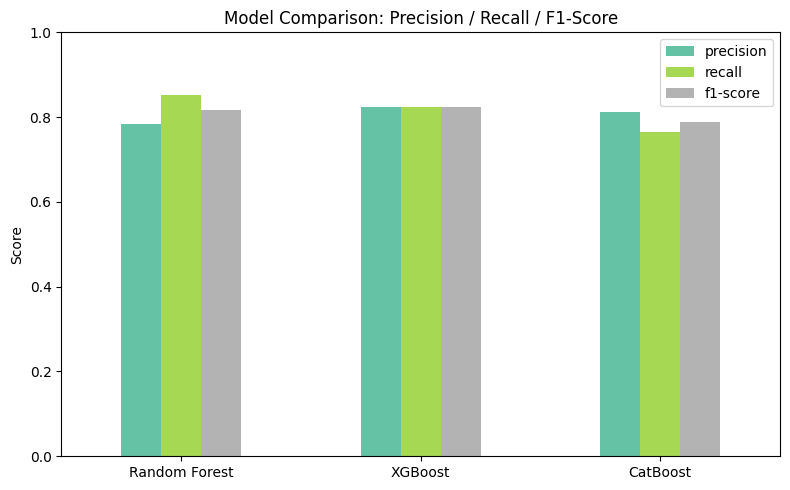

In [ ]:
#  Split once (as before)
X_train, X_test, y_train, y_test = train_test_split(
    X_common, y_common, test_size=0.2, random_state=42, stratify=y_common
)

# Train Random Forest (unchanged)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# FIX for XGBoost
cat_cols = [
    'Age Range','Cycle(R/I)','hair growth(Y/N)',
    'Skin darkening (Y/N)','Hair loss(Y/N)',
    'Pimples(Y/N)','Reg.Exercise(Y/N)'
]

# Convert categorical columns to integer codes for XGB
for col in cat_cols:
    X_train[col] = X_train[col].astype('category').cat.codes
    X_test[col]  = X_test[col].astype('category').cat.codes

#  Train XGBoost (drop use_label_encoder)
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

#  Train CatBoost (now defining cat_feats)
#  Get the indices of the categorical features in the common_features list:
common_features = [
    'Age Range', 'Weight (Kg)', 'BMI', 'Cycle(R/I)',
    'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
    'Pimples(Y/N)', 'Reg.Exercise(Y/N)'
]
cat_feats = [common_features.index(c) for c in cat_cols]

cb = CatBoostClassifier(
    iterations=500,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    cat_features=cat_feats,
    random_state=42,
    verbose=False
)
cb.fit(X_train, y_train)
cb_preds = cb.predict(X_test)

#  Generate and compare reports
from sklearn.metrics import classification_report
import pandas as pd

models = {
    "Random Forest": rf_preds,
    "XGBoost":       xgb_preds,
    "CatBoost":      cb_preds
}

results = {}
for name, preds in models.items():
    rep = classification_report(y_test, preds, output_dict=True)['1']
    results[name] = {
        'precision': rep['precision'],
        'recall':    rep['recall'],
        'f1-score':  rep['f1-score']
    }

metrics_df = pd.DataFrame(results).T
print(metrics_df[['precision','recall','f1-score']])

#  Visualize
import seaborn as sns
import matplotlib.pyplot as plt

metrics_df.plot(kind='bar', figsize=(8,5), colormap='Set2')
plt.ylim(0,1)
plt.title("Model Comparison: Precision / Recall / F1‑Score")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Interpretation of the results**: Random Forest demonstrated the highest recall (0.853), meaning it identified the most true PCOS cases, making it a strong choice for clinical screening.

XGBoost had the best F1-score (0.824), suggesting it struck the best overall balance between precision and recall.

CatBoost performed slightly lower on recall but still achieved competitive precision.

